In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

# Files to Load
sneaker_data_to_load = Path("SNKR_DataProject.csv")

# Read sneaker data and store into Pandas DataFrames
sneaker_data = pd.read_csv(sneaker_data_to_load)


In [111]:
#Remove dollar signs and commas in Sale Price column

def convert_price(price):
    if pd.notnull(price) and isinstance(price, str):
        return pd.to_numeric(price.replace(',', '').replace('$', ''))
    else:
        return price

sneaker_data['Sale Price'] = sneaker_data['Sale Price'].apply(convert_price)

In [112]:
# Remove dollar signs in Retail Price column
sneaker_data['Retail Price'] = pd.to_numeric(sneaker_data['Retail Price'].str.replace('$', ''))

## This represents the entire dataset. 

In [113]:
# View data set
sneaker_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer State,Region,Division,Abbreviation
0,9/1/17,Adidas,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/16,11.0,California,West,Pacific,CA
1,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/16,11.0,California,West,Pacific,CA
2,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/16,11.0,California,West,Pacific,CA
3,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/16,11.5,Kentucky,South,East South Central,KY
4,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/17,11.0,Rhode Island,Northeast,New England,RI


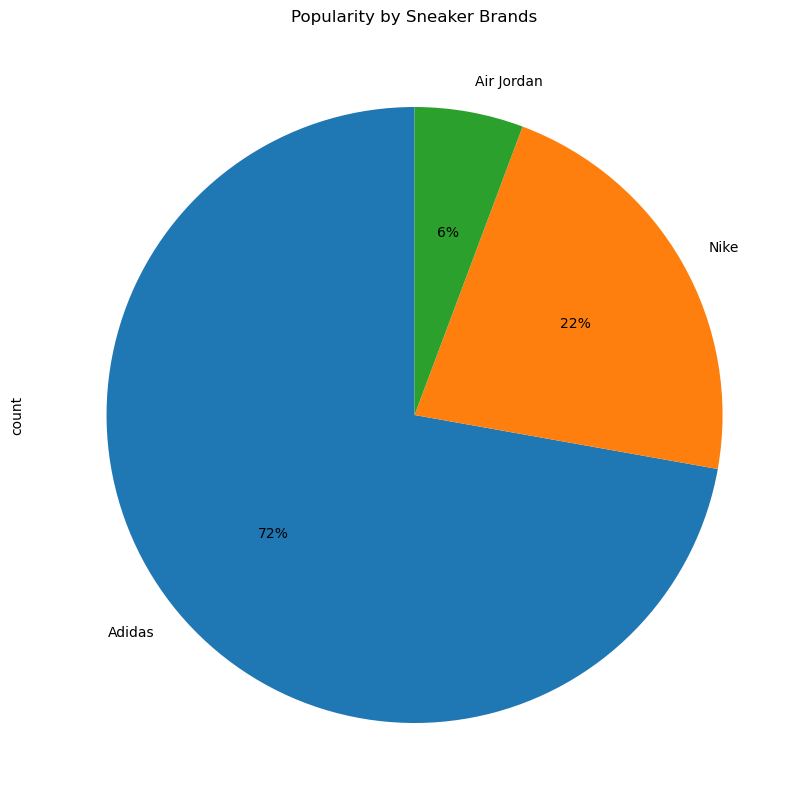

In [114]:
# Create a pie chart
plt.figure(figsize=(10,10))
sneaker_data ['Brand'].value_counts().plot(kind='pie',startangle=90, autopct='%1.0f%%')
plt.title('Popularity by Sneaker Brands')
plt.show()

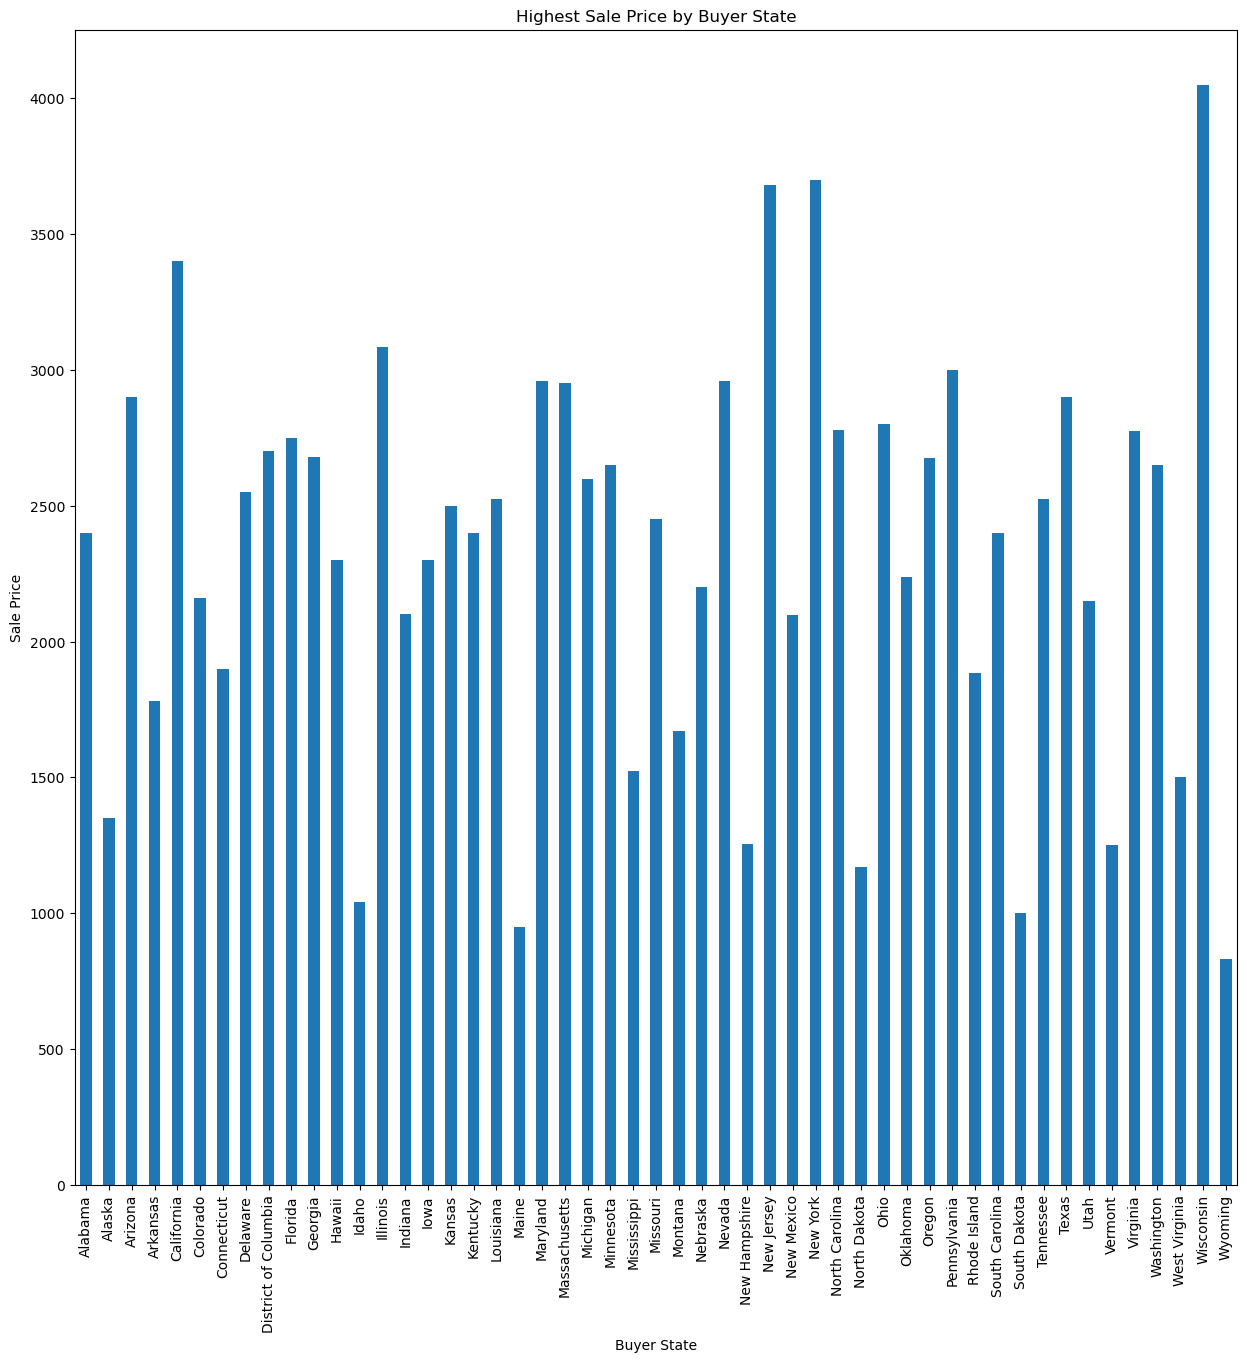

In [115]:
#Highest cost per State
sneaker_data['Sale Price'] = pd.to_numeric(sneaker_data['Sale Price'], errors='coerce')

# Group by State and maximum sales price
grouped = sneaker_data.groupby('Buyer State')['Sale Price'].max()
plt.figure(figsize=(15,15))
grouped.plot(kind='bar')
plt.title('Highest Sale Price by Buyer State')
plt.ylabel('Sale Price')
plt.xlabel('Buyer State')
plt.show()

In [116]:
# Update spreadsheet with Sneaker Price Difference
sneaker_data['Price Difference'] = sneaker_data['Sale Price'] - sneaker_data['Retail Price']
sneaker_data['ROI'] = ((sneaker_data['Price Difference']/sneaker_data['Retail Price'])*100).round(2)

sneaker_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer State,Region,Division,Abbreviation,Price Difference,ROI
0,9/1/17,Adidas,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/16,11.0,California,West,Pacific,CA,877.0,398.64
1,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/16,11.0,California,West,Pacific,CA,465.0,211.36
2,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/16,11.0,California,West,Pacific,CA,470.0,213.64
3,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/16,11.5,Kentucky,South,East South Central,KY,855.0,388.64
4,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/17,11.0,Rhode Island,Northeast,New England,RI,608.0,276.36


<Figure size 4000x4000 with 0 Axes>

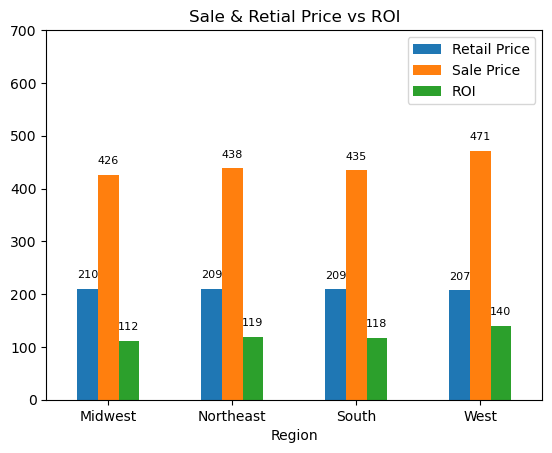

In [117]:
#Bar chart grouped by region and display mean ROI
grouped_sneaker_name = sneaker_data.groupby('Region')[['Retail Price','Sale Price', 'ROI']].mean()
plt.figure(figsize=(40,40))
Bar1 = grouped_sneaker_name.plot(kind='bar')

# Adding data labels
for p in Bar1.patches:
    Bar1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Sale & Retial Price vs ROI')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.ylim(0, 700)
plt.show()

<Figure size 1200x1500 with 0 Axes>

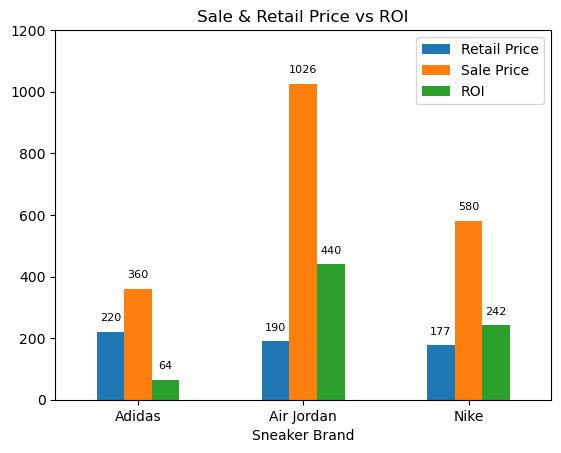

In [118]:
grouped_sneaker_name = sneaker_data.groupby('Brand')[['Retail Price', 'Sale Price', 'ROI']].mean()
grouped_sneaker_name = grouped_sneaker_name.round(0) 
plt.figure(figsize=(12, 15))
Bar2= grouped_sneaker_name.plot(kind='bar')

# Adding data labels
for p in Bar2.patches:
    Bar2.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Sale & Retail Price vs ROI')
plt.xlabel('Sneaker Brand')
plt.xticks(rotation=0)
plt.ylim(0, 1200)
plt.show()

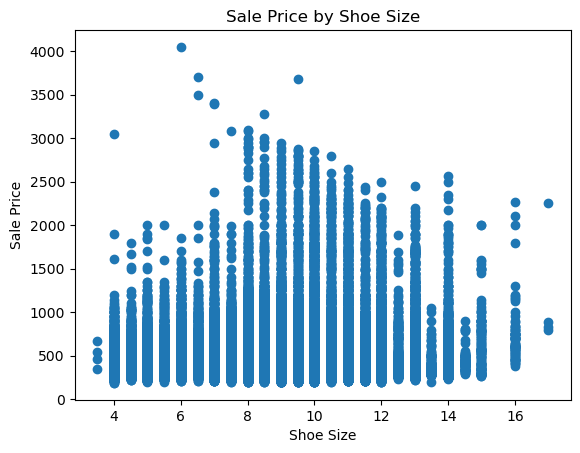

In [119]:
# Scatter plot
plt.scatter(sneaker_data['Shoe Size'], sneaker_data['Sale Price'])
plt.title('Sale Price by Shoe Size')
plt.xlabel('Shoe Size')
plt.ylabel('Sale Price')
plt.show()

In [120]:
# Basic statistical details like percentile, mean, std, etc by region
summary = sneaker_data.groupby('Region')['Price Difference'].describe()

print(summary)

             count        mean         std   min   25%    50%     75%     max
Region                                                                       
Midwest    12849.0  215.763406  249.181590 -20.0  53.0  140.0  300.00  3860.0
Northeast  29171.0  228.860444  260.828664 -34.0  55.0  148.0  328.00  3510.0
South      24580.0  225.612897  258.118819 -25.0  55.0  147.0  318.00  2770.0
West       33356.0  263.749940  280.533388 -29.0  65.0  170.0  385.25  3210.0


<Figure size 1500x1500 with 0 Axes>

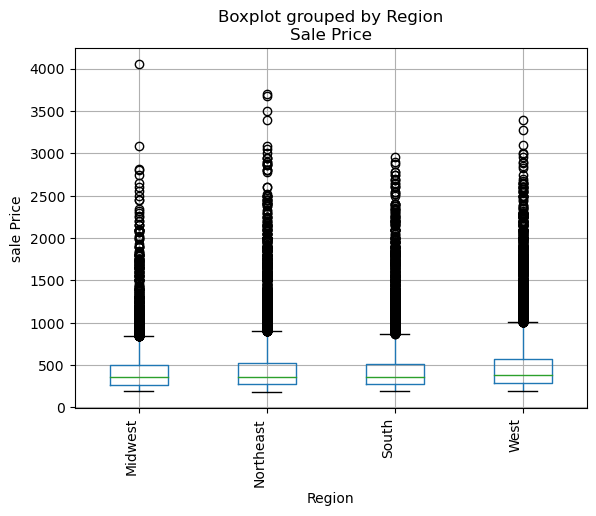

In [121]:
# Box plot based on Region and price difference for the sneakers
plt.figure(figsize=(15, 15))
sneaker_data.boxplot(column='Sale Price', by='Region', grid=True)
plt.xlabel('Region')
plt.ylabel('sale Price')
plt.xticks(rotation=90, ha='right')
plt.show()

<Figure size 1500x1500 with 0 Axes>

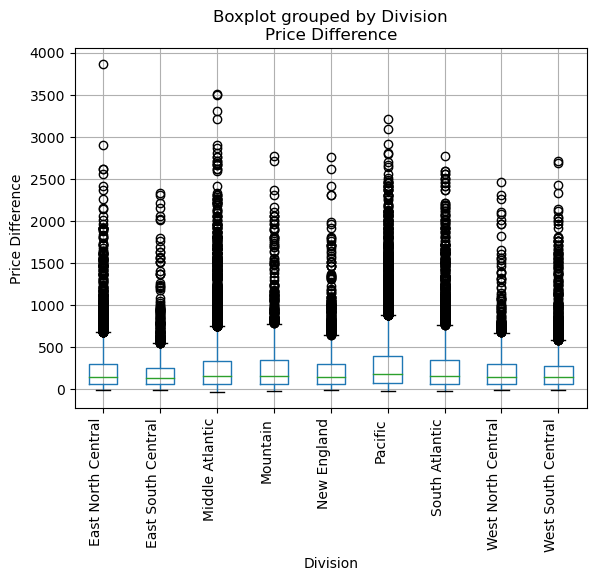

In [122]:
# Box plot based on division and price difference for the sneakers
plt.figure(figsize=(15, 15))
sneaker_data.boxplot(column='Price Difference', by='Division', grid=True)
plt.xlabel('Division')
plt.ylabel('Price Difference')
plt.xticks(rotation=90, ha='right')
plt.show()

In [123]:
# New column for year only and ignore formatting errors
sneaker_data['Release Date'] = pd.to_datetime(sneaker_data['Release Date'], errors='coerce')
sneaker_data['Year'] = sneaker_data['Release Date'].dt.year
sneaker_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer State,Region,Division,Abbreviation,Price Difference,ROI,Year
0,9/1/17,Adidas,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0,California,West,Pacific,CA,877.0,398.64,2016
1,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0,California,West,Pacific,CA,465.0,211.36,2016
2,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0,California,West,Pacific,CA,470.0,213.64,2016
3,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5,Kentucky,South,East South Central,KY,855.0,388.64,2016
4,9/1/17,Adidas,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-02-11,11.0,Rhode Island,Northeast,New England,RI,608.0,276.36,2017


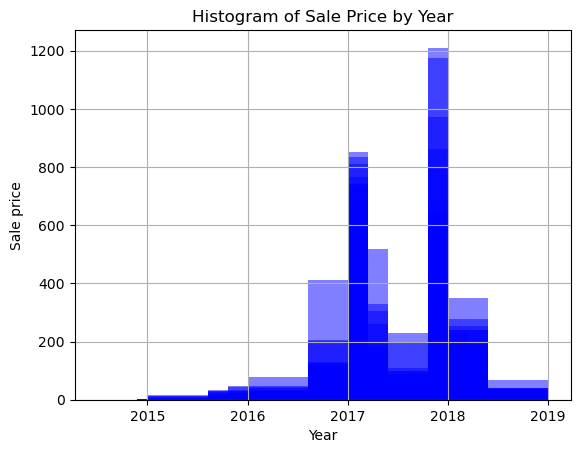

In [124]:
# Group function by sale price and year
grouped_sale_year = sneaker_data.groupby('Sale Price')['Year']

# Plotting the histograph by the year column created previously
fig, ax = plt.subplots()
for label, df in grouped_sale_year:
    df.hist(label=label, ax=ax, alpha=0.5, bins=5, color='b')
plt.xlabel('Year')
plt.ylabel('Sale price')
plt.title('Histogram of Sale Price by Year')
plt.show()

In [125]:
# group states by sale price and count of sales
statedata = sneaker_data.drop(['Order Date', 'Brand', 'Sneaker Name', 'Release Date', 'Shoe Size', 'Year', 'Price Difference'], axis=1)
stategrouped_price = statedata.groupby(['Abbreviation'])['Sale Price'].sum()
stategrouped_count = statedata.groupby(['Abbreviation'])['Abbreviation'].value_counts()
stategrouped_mean = (stategrouped_price/stategrouped_count).round(2)


In [126]:
#Create df for state summary
stategrouped_summary = pd.DataFrame({"Total Sales $": stategrouped_price,
                                     "Total Sales Count": stategrouped_count,
                                     "Average Sales Price": stategrouped_mean
                                     })
stategrouped_summary.head()

,Total Sales $,Total Sales Count,Average Sales Price
Abbreviation,,,
AK,26560.0,61,435.41
AL,180907.0,457,395.86
AR,70560.0,173,407.86
AZ,627806.0,1398,449.07
CA,9253624.0,19349,478.25


In [127]:
#Adjust df to show Abbreviation as column header
stategrouped_summary.reset_index(inplace=True)
stategrouped_summary.head()

,Abbreviation,Total Sales $,Total Sales Count,Average Sales Price
0,AK,26560.0,61,435.41
1,AL,180907.0,457,395.86
2,AR,70560.0,173,407.86
3,AZ,627806.0,1398,449.07
4,CA,9253624.0,19349,478.25


In [128]:
# Create states heat map
print("Plotly chart should render here")

HeatMap_Sales = px.choropleth(stategrouped_summary,
                    locations="Abbreviation", 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Total Sales $',
                    color_continuous_scale="Viridis_r", 
                    
                    )
HeatMap_Sales.update_layout(
      title_text = 'Total Sales $ by State',
      title_font_family="Arial",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

HeatMap_Sales.show()

Plotly chart should render here


In [129]:
#Display top 5 states by sales dollars
Top_Dollars_States = stategrouped_summary.sort_values('Total Sales $', ascending=False)
Top_Dollars_States.head(5)

,Abbreviation,Total Sales $,Total Sales Count,Average Sales Price
4,CA,9253624.0,19349,478.25
34,NY,7316727.0,16525,442.77
37,OR,3606621.0,7681,469.55
9,FL,2840034.0,6376,445.43
43,TX,2451756.0,5876,417.25


In [130]:
#Display top 5 states by sales dollars
Top_Sales_States = stategrouped_summary.sort_values('Total Sales Count', ascending=False)
Top_Sales_States.head(5)

,Abbreviation,Total Sales $,Total Sales Count,Average Sales Price
4,CA,9253624.0,19349,478.25
34,NY,7316727.0,16525,442.77
37,OR,3606621.0,7681,469.55
9,FL,2840034.0,6376,445.43
43,TX,2451756.0,5876,417.25


In [131]:
Bottom_Dollars_States = stategrouped_summary.sort_values('Total Sales $', ascending=True)
Bottom_Dollars_States.head(5)

,Abbreviation,Total Sales $,Total Sales Count,Average Sales Price
50,WY,13751.0,40,343.78
26,MT,20375.0,49,415.82
41,SD,21601.0,55,392.75
0,AK,26560.0,61,435.41
28,ND,27122.0,64,423.78


In [132]:
Bottom_Sales_States = stategrouped_summary.sort_values('Total Sales Count', ascending=True)
Bottom_Sales_States.head(5)

,Abbreviation,Total Sales $,Total Sales Count,Average Sales Price
50,WY,13751.0,40,343.78
26,MT,20375.0,49,415.82
41,SD,21601.0,55,392.75
0,AK,26560.0,61,435.41
28,ND,27122.0,64,423.78


In [133]:
#Heat Map
print("Plotly chart should render here")
HeatMap_SalesMean = px.choropleth(stategrouped_summary,
                    locations="Abbreviation", 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Average Sales Price',
                    color_continuous_scale="Viridis_r", 
                    
                    )

HeatMap_SalesMean.update_layout(
      title_text = 'Average Sales Price by State',
      title_font_family="Arial",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
HeatMap_SalesMean.show()

Plotly chart should render here


<Axes: title={'center': 'Sale Price'}, xlabel='Region'>

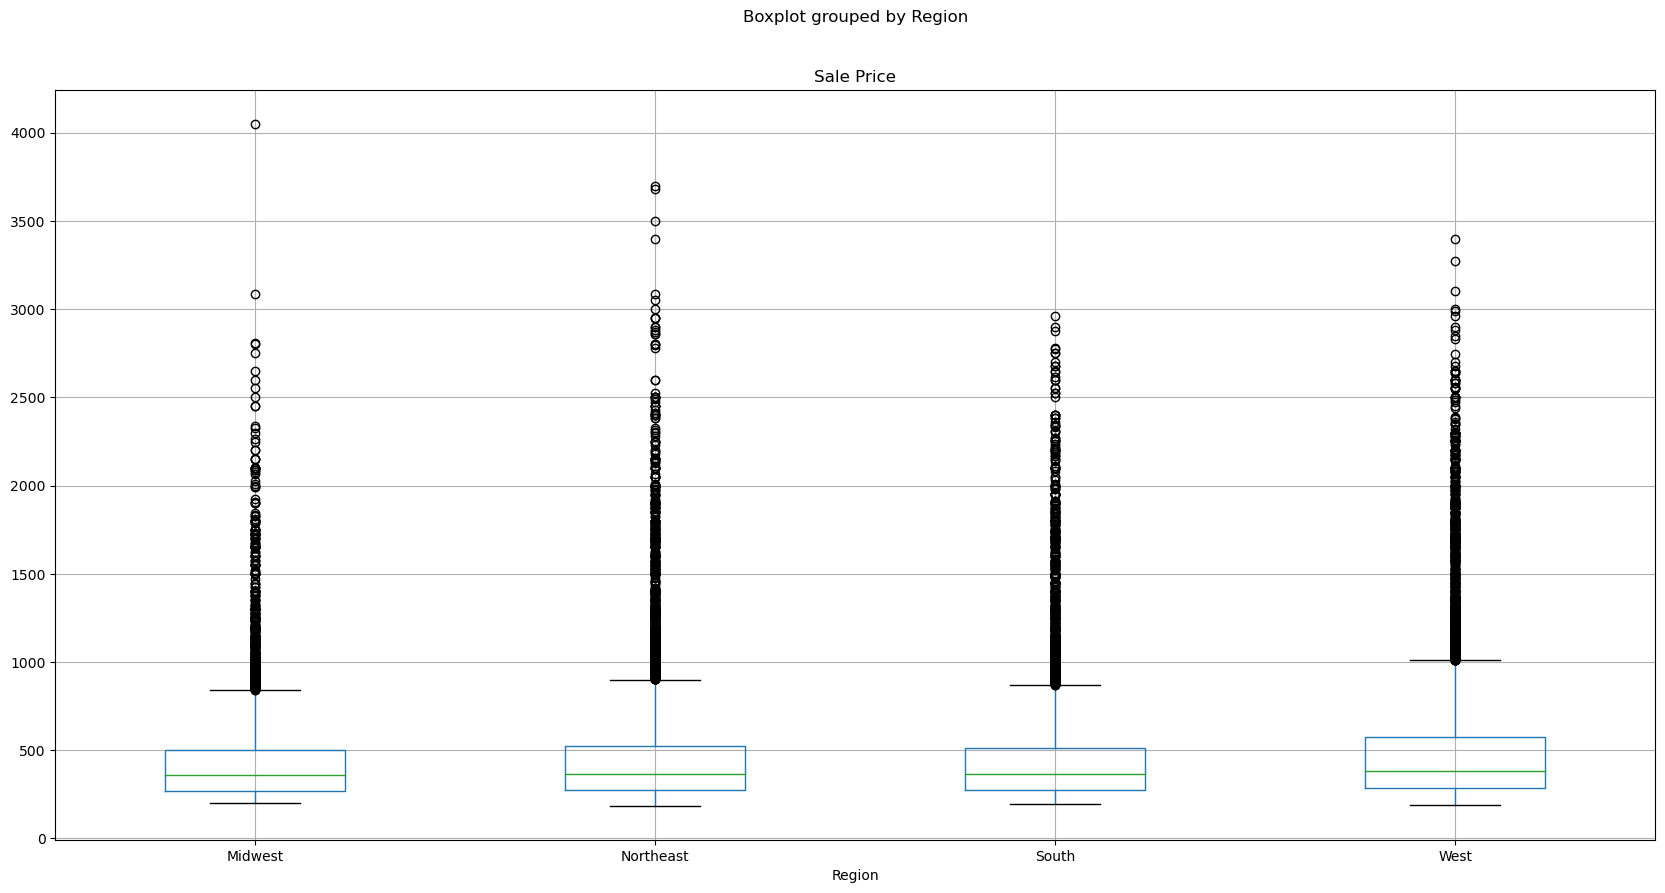

In [134]:
# Create a boxplot to compare means
sneaker_data.boxplot("Sale Price", by="Region", figsize=(20, 10))

In [135]:
# Extract individual groups
group0 = sneaker_data[sneaker_data["Region"] == "Midwest"]["Sale Price"]
group1 = sneaker_data[sneaker_data["Region"] == "Northeast"]["Sale Price"]
group2 = sneaker_data[sneaker_data["Region"] == "South"]["Sale Price"]
group3 = sneaker_data[sneaker_data["Region"] == "West"]["Sale Price"]

In [136]:
# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3)

F_onewayResult(statistic=155.83677198051998, pvalue=9.012753413157402e-101)